<a href="https://colab.research.google.com/github/msrepo/ml-mscise-2023/blob/master/AUC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!python -c "import sklearn; print(sklearn.__version__)" # check if we have sklearn 1.20 for DecisionBoundaryDisplay

1.2.0


In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [36]:
N = 100
seed = 12345
x, y = make_classification(n_samples=N,n_features=2,n_informative=2,n_redundant=0,n_repeated=0,n_classes=2,n_clusters_per_class=1,hypercube=True,class_sep=0.1,random_state=seed)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

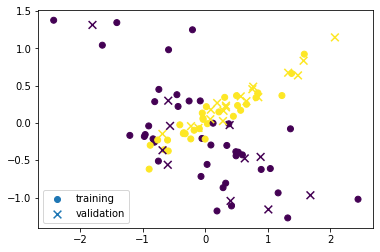

In [42]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,label='training')
plt.scatter(x_test[:,0],x_test[:,1],marker='x',s=60,c=y_test,label='validation')
plt.legend()

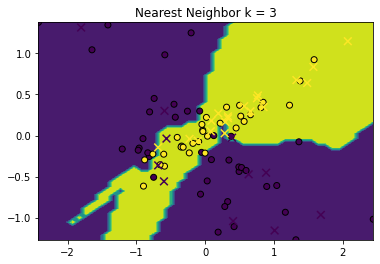

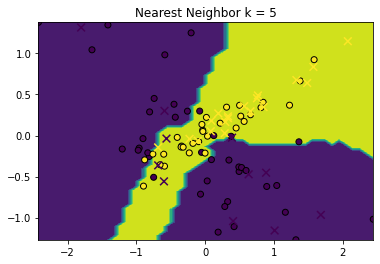

In [46]:
def show_decision_boundary(n_neighbors):
  model_a = KNeighborsClassifier(n_neighbors=n_neighbors)
  model_a.fit(x_train,y_train)

  from sklearn.inspection import DecisionBoundaryDisplay
  feature1, feature2 = np.meshgrid(np.linspace(x[:,0].min(), x[:,0].max()),
                                  np.linspace(x[:,1].min(),x[:,1].max()))
  response=model_a.predict(np.vstack([feature1.ravel(),feature2.ravel()]).T)
  display = DecisionBoundaryDisplay(xx0=feature1,xx1=feature2,response=np.reshape(response,feature1.shape))
  display.plot()
  display.ax_.scatter(x_train[:,0],x_train[:,1],c=y_train,label='training',edgecolor='black')
  display.ax_.scatter(x_test[:,0],x_test[:,1],marker='x',s=60,c=y_test,label='validation',edgecolor='black')
  display.ax_.set_title(f'Nearest Neighbor k = {n_neighbors}')

show_decision_boundary(n_neighbors=3)
show_decision_boundary(n_neighbors=5)

**Performance Metrics**

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

KNearestNeighbor k=3
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.82      0.95      0.88        19

    accuracy                           0.83        30
   macro avg       0.85      0.79      0.81        30
weighted avg       0.84      0.83      0.83        30



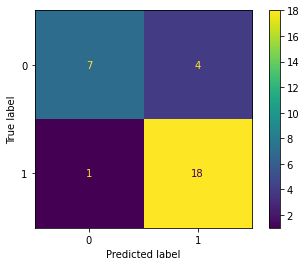

In [45]:
num_neighbors = 3
model_a = KNeighborsClassifier(n_neighbors=num_neighbors)
model_a.fit(x_train,y_train)
y_pred = model_a.predict(x_test)
print(f'KNearestNeighbor k={num_neighbors}')
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

KNearestNeighbor k=3
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.82      0.95      0.88        19

    accuracy                           0.83        30
   macro avg       0.85      0.79      0.81        30
weighted avg       0.84      0.83      0.83        30

KNearestNeighbor k=5
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.83      1.00      0.90        19

    accuracy                           0.87        30
   macro avg       0.91      0.82      0.84        30
weighted avg       0.89      0.87      0.86        30

KNearestNeighbor k=10
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.82      0.95      0.88        19

    accuracy                           0.83        30
   macro avg       0.85      0.79      0.81        30
weighted a

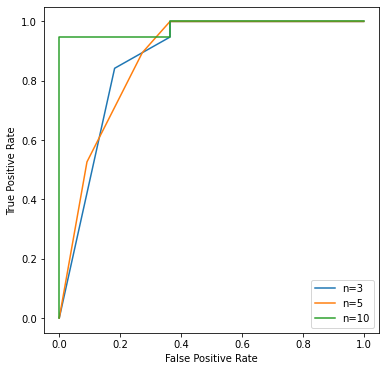

In [52]:
fprs, tprs = [] , [] 
fig = plt.figure(figsize=(6,6))
for i in [3,5,10]:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  print(f'KNearestNeighbor k={i}')
  print(classification_report(y_test,model.predict(x_test)))
  y_pred_proba = model.predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba[:,1],pos_label=1)
  plt.plot(fpr,tpr,label=f'n={i}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score

